In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

Load the data and ghet the overview

In [2]:
cheese_file = 'Data_Science_Test_Datasets/Cheese_Production_Data.txt'
df = pd.read_csv(cheese_file,sep=",",low_memory=False)
df.head()

,Year,Month,Cheese1.Prod,Cheese2.Prod,Cheese3.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
2,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
3,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
4,1995,May,4.470,73.730,2.227,0.8967,5,25,125


In [3]:
df.describe()

,Year,Cheese1.Prod,Cheese2.Prod,Cheese3.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02
mean,2003.846847,2.853068,71.112203,2.933923,1.497969,112.680180,16997.950450,2.895317e+06
std,5.467631,0.503402,11.165503,0.476233,0.395266,65.731192,15469.538339,3.351320e+06
min,1995.000000,1.865000,47.127000,1.932000,0.892400,1.000000,1.000000,1.000000e+00
25%,1999.000000,2.535000,61.387250,2.562250,1.200925,56.250000,3164.250000,1.780102e+05
50%,2004.000000,2.742500,71.763500,3.037500,1.424300,111.500000,12432.500000,1.386280e+06
75%,2009.000000,2.964000,80.197500,3.336000,1.750625,169.750000,28815.250000,4.891452e+06
max,2013.000000,4.538000,93.010000,3.804000,2.528500,228.000000,51984.000000,1.185235e+07


It seems that the month data written in string "May, Apr..." Let's convert it to number

In [4]:
import calendar
d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
df['Month'] = df['Month'].map(d)
df.head()

,Year,Month,Cheese1.Prod,Cheese2.Prod,Cheese3.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
0,1995,1,4.370,51.595,2.112,0.9803,1,1,1
1,1995,2,3.695,56.086,1.932,0.8924,2,4,8
2,1995,3,4.538,68.453,2.162,0.8924,3,9,27
3,1995,4,4.280,65.722,2.130,0.8967,4,16,64
4,1995,5,4.470,73.730,2.227,0.8967,5,25,125


Combine year data and month data to "Date"

In [5]:
df['Date'] = pd.to_datetime(df[['Year','Month']].assign(day=1))
df.head()

,Year,Month,Cheese1.Prod,Cheese2.Prod,Cheese3.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,Date
0,1995,1,4.370,51.595,2.112,0.9803,1,1,1,1995-01-01
1,1995,2,3.695,56.086,1.932,0.8924,2,4,8,1995-02-01
2,1995,3,4.538,68.453,2.162,0.8924,3,9,27,1995-03-01
3,1995,4,4.280,65.722,2.130,0.8967,4,16,64,1995-04-01
4,1995,5,4.470,73.730,2.227,0.8967,5,25,125,1995-05-01


Find the month and year which are missing in dataset and create it with NA value

In [7]:
import datetime
for i in range(1995, 2014):
    for j in range(1,13):
        date_obj = datetime.datetime(i,j,1)
        if date_obj not in df['Date'].tolist():
            print(date_obj)
            a = {"Year":i,
                "Month":j,
                "Cheese1.Prod":np.nan,
                "Cheese2.Prod":np.nan,
                "Cheese3.Prod":np.nan,
                "N.CA.Fat.Price":np.nan,
                "Month.Count":np.nan,
                "monthNumSqred":np.nan,
                "monthNumCubed":np.nan,
                'Date':date_obj}
            df =df.append(a,ignore_index=True)
df.sort_values(['Date'],inplace=True)

2007-04-01 00:00:00
2007-07-01 00:00:00
2008-11-01 00:00:00
2011-03-01 00:00:00
2012-01-01 00:00:00
2013-09-01 00:00:00


Set "Date" as the index 

In [8]:
df.set_index('Date',inplace=True)


In [12]:
df.shape[0]

228

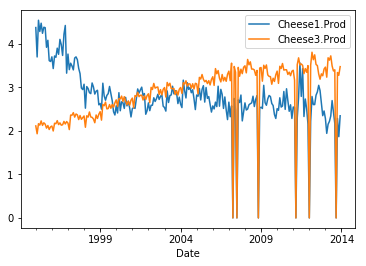

In [28]:
df[['Cheese1.Prod','Cheese3.Prod']].resample('M').sum().plot(kind='line')

As we can set, the are some missing data which makes the lines drop unexpectedly. Here are strategy I'm planning to do but cannot solve due to the time:
- Resolve the missing data (NA value) by taking the average of the previous and the after month value. By using this, we could approximate the missing value and make the line smooth. 
- In order to forcasting the chese productions volumnes for the next year one, we need data for training which makes the model to learn and could predict for the next one. In my plan, I will split the dataset based on time, all data from 1995-2012 will be used for the training and the data in 2013 will be used for the testing production volumnes. 
- It looks like the data have some fluctuation but we could see the overal trending from it, so it is better to preprocess the data to make it cleaner. I haven't tried but there are some ways I think it might be usefull: standardlization, use log transform to make data cleaner,...
- To learn about the time-series data, I'm planning to use Long Short Term Memorry Model. It is a kind of recurrent neural network which could capture the information in the past and use it to predict the future. 

Those are something I'm planning to do to deal with the time series analysis and forcasting.